In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nomeArquivo = "teste" #Sem extensao
df = pd.read_table (nomeArquivo+".txt", sep='\s+')
df["tempoTotal"] = df.apply (lambda row: row["Recebido"] - row["Enviado"], axis=1)
df["tempoRegra"] = df.apply (lambda row: row["tempoTotal"] / row["Regras"], axis=1)
df.set_index(['Execucao', 'Regras','Indice'], inplace=True)            
df

Enviado    Recebido  tempoTotal  tempoRegra
Execucao Regras Indice                                                
1        250    1         8.776887   13.093014    4.316127    0.017265
         500    1        16.266657   26.562795   10.296138    0.020592
         750    1        29.824126   51.201919   21.377793    0.028504
         1000   1        54.541084   88.099609   33.558525    0.033559
         1250   1        91.551597  143.683448   52.131851    0.041705
         1500   1       147.206243  217.132429   69.926186    0.046617
         1750   1       220.747173  320.863927  100.116754    0.057210
         2000   1       324.574773  504.986139  180.411366    0.090206
         2250   1       508.800643  799.391925  290.591282    0.129152
2        250    1        10.878861   16.260098    5.381237    0.021525
         500    1        19.433257   32.029806   12.596549    0.025193
         750    1        35.285650   52.899469   17.613819    0.023485
         1000   1        56.289846   86.499616   30.209770    0.030210
         1250   1        89.952228  138.825194   48.872966    0.039098
         1500   1       142.348056  214.881697   72.533641    0.048356
         1750   1       218.494285  337.371503  118.877218    0.067930
         2000   1       341.079050  520.437202  179.358152    0.089679
         2250   1       524.291203  792.355416  268.064213    0.119140
3        250    1         4.064221    8.730941    4.666720    0.018667
         500    1        11.910840   21.743198    9.832358    0.019665
         750    1        25.003568   44.766509   19.762941    0.026351
         1000   1        48.120678   76.764045   28.643367    0.028643
         1250   1        80.205770  129.372468   49.166698    0.039333
         1500   1       132.889810  208.098589   75.208779    0.050139
         1750   1       211.744629  327.556860  115.812231    0.066178
         2000   1       331.310850  499.725376  168.414526    0.084207
         2250   1       503.627323  763.528906  259.901583    0.115512
1        250    2         5.612641   11.043818    5.431177    0.021725
         500    2        14.222589   25.319847   11.097258    0.022195
         750    2        28.585706   49.612605   21.026899    0.028036
         1000   2        52.963444   88.334812   35.371368    0.035371
         1250   2        91.775447  145.356512   53.581065    0.042865
         1500   2       148.876425  217.588728   68.712303    0.045808
         1750   2       221.246252  333.358821  112.112569    0.064064
         2000   2       337.111973  511.148188  174.036215    0.087018
         2250   2       515.058333  822.158933  307.100600    0.136489
2        250    2         6.752952   11.785520    5.032568    0.020130
         500    2        14.963521   25.860348   10.896827    0.021794
         750    2        29.118714   47.131351   18.012637    0.024017
         1000   2        50.478851   79.564006   29.085155    0.029085
         1250   2        83.009801  131.676274   48.666473    0.038933
         1500   2       135.212412  209.104492   73.892080    0.049261
         1750   2       212.759158  319.609340  106.850182    0.061057
         2000   2       323.382483  487.290639  163.908156    0.081954
         2250   2       491.203452  784.011064  292.807612    0.130137
3        250    2        14.507943   19.024371    4.516428    0.018066
         500    2        22.199376   32.595631   10.396255    0.020793
         750    2        35.853900   54.517042   18.663142    0.024884
         1000   2        57.860855   91.368919   33.508064    0.033508
         1250   2        94.806978  146.174264   51.367286    0.041094
         1500   2       149.700266  226.790755   77.090489    0.051394
         1750   2       230.407481  340.353630  109.946149    0.062826
         2000   2       344.071538  514.602126  170.530588    0.085265
         2250   2       518.428447  794.177041  275.748594    0.122555

In [3]:
gpb = df.groupby (["Regras","Indice"])

In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

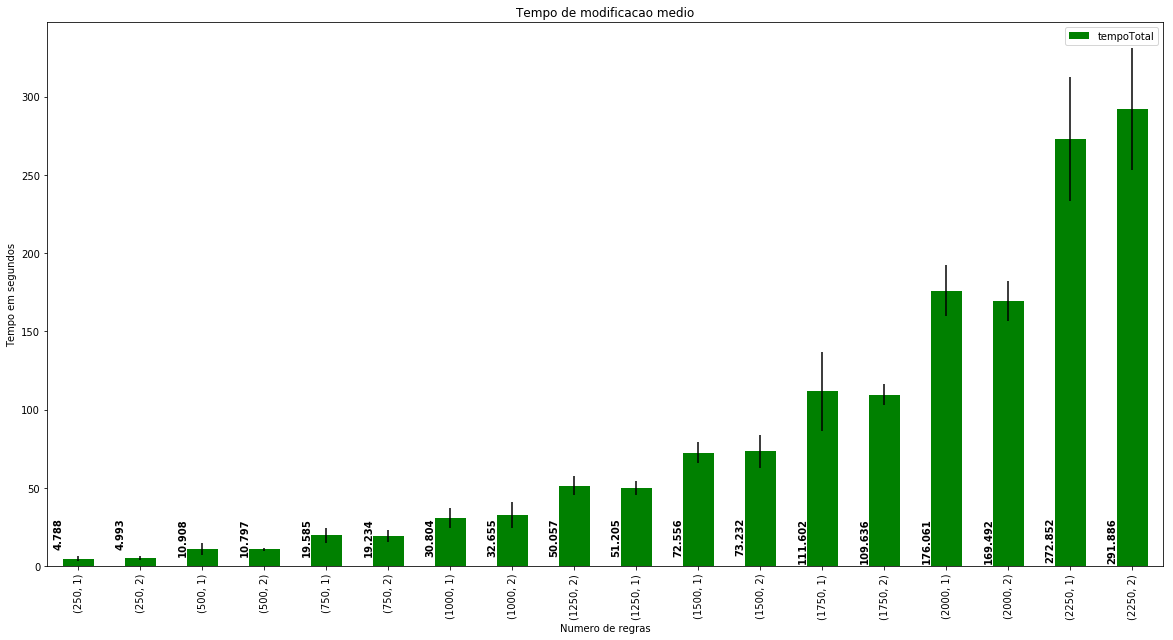

In [42]:
# Grafico da porcentagem de perda de pacotes em relação aos pacotes transmitidos no slice
err = gpb.aggregate(confinterval)
media = gpb.mean()
err = err.filter(items=['tempoTotal'])
media = media.filter(items=['tempoTotal'])

#media.plot (kind='bar', yerr=err, title="Tempo de modificacao medio", rot=90, figsize=(10,5))
media.sort_values(by=["Regras"]).plot (color='green', kind='bar', yerr=err, title="Tempo de modificacao medio", rot=90, figsize=(20,10))
plt.xlabel('Numero de regras')
plt.ylabel('Tempo em segundos')
for i, v in enumerate(media['tempoTotal']):
    plt.text(i-0.4, 26, str("%.3f" %v), color='black', fontweight='bold', rotation=90) #i-0.5 v+1
#plt.gca().legend('Tempototal')
plt.savefig(nomeArquivo+".pdf")
plt.show()